<a href="https://colab.research.google.com/github/bforoura/AI/blob/main/Module6/CNN_Facial_Expression_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Expression Classification  with Convolutional Neural Networks (CNN)**


* **Convolutional Neural Networks** (CNNs) are a class of deep neural networks, most commonly applied to analyzing visual imagery. They are widely used in tasks such as image recognition, image classification, object detection, and more.

* At a high level, CNNs are inspired by the organization of the visual cortex and are designed to automatically and adaptively learn spatial hierarchies of features from raw input data. This makes them extremely effective for tasks involving images and other types of spatial data.

* CNNs consist of multiple layers, including **convolutional layers**, **pooling layers**, and **fully connected layers**.

* CNNs have revolutionized the field of computer vision and have been instrumental in achieving state-of-the-art performance in various image-related tasks.

* CNN's ability to automatically learn hierarchical representations of data makes them powerful tools for a wide range of applications.

* CNNs can learn to extract features from images that are indicative of emotions such as happiness, sadness, anger, etc.



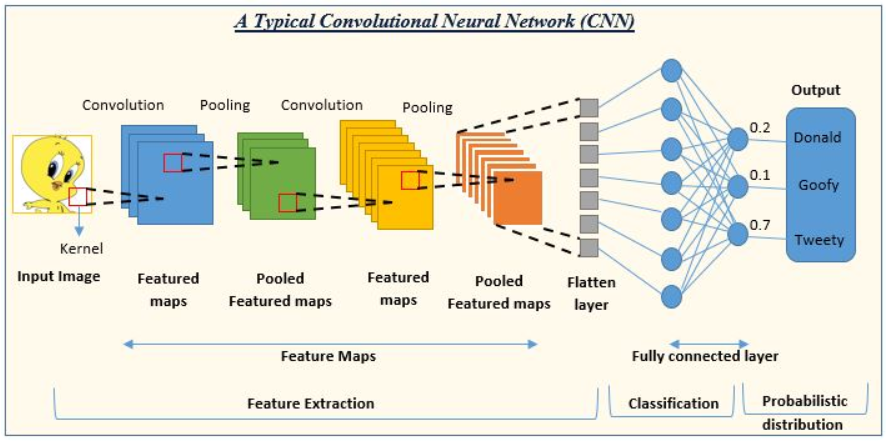


**Convolutional Layer**
* This layer applies a set of filters (kernels) to the input image, which helps extract important features like edges, shapes, and textures.
* Each filter is convolved (slid) across the input image to produce a feature map.


**Pooling Layer**
* The pooling layer downsamples the feature maps generated by the convolutional layers.
* It helps reduce the spatial dimensions of the feature maps while retaining important information.
* Common pooling operations include **max pooling** and **average pooling**.

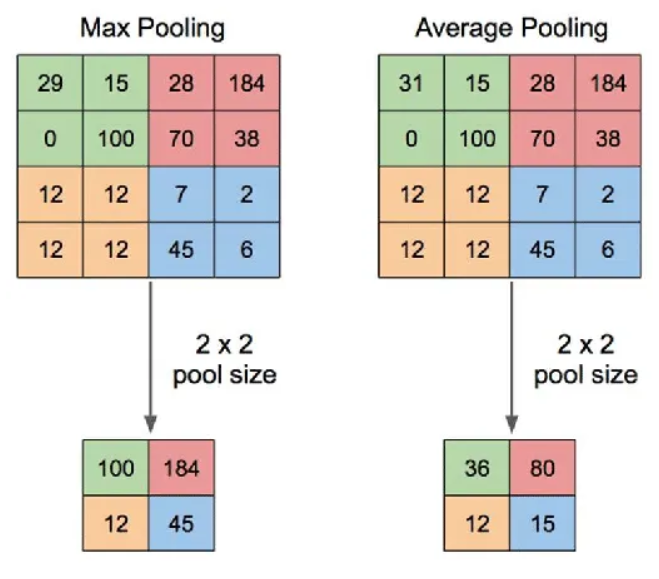

**Fully Connected Layer**
* Also known as the **dense layer**, this layer connects every neuron in the previous layer to every neuron in the current layer.
* It helps in learning non-linear combinations of features from the previous layers.



**Activation Function**
* Typically, each layer in a CNN is followed by an activation function such as **ReLU** (Rectified Linear Unit), which introduces non-linearity into the network, allowing it to learn complex patterns in the data.

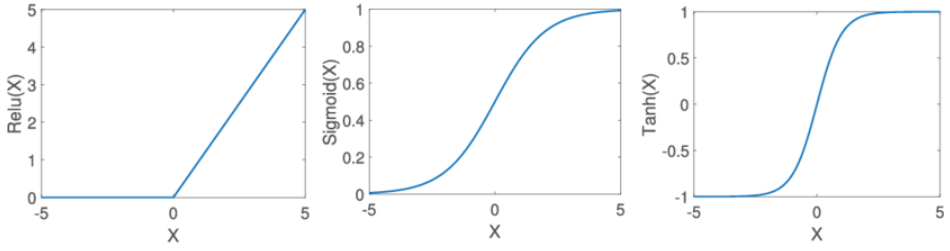



**Softmax Layer**
* In the final layer of a CNN used for classification tasks, a softmax activation function is often used to convert the network's raw output into probability scores for each class.
* This helps in determining the most likely class for the input image.

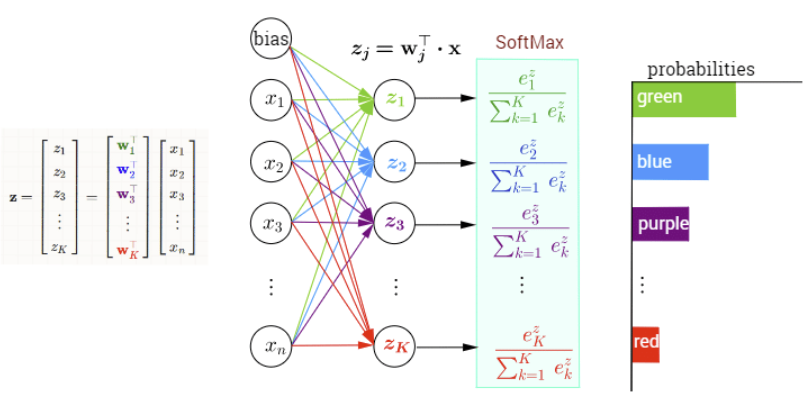

# **The FER-2013 Dataset**

* The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centred and occupies about the same amount of space in each image.

* The task is to categorize each face based on the emotion shown in the facial expression into one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).

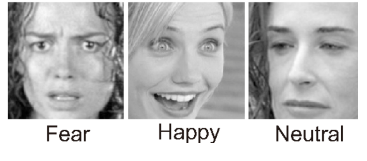

* The training set consists of 28,709 examples and the public test set consists of 3,589 examples.

* https://www.kaggle.com/datasets/msambare/fer2013


In [21]:
!ls drive/MyDrive/'Colab Notebooks'


 alcohol_consumption.ipynb		      linear_regression_R.ipynb
 anne.ipynb				      MNIST_CNN.ipynb
'AStar (1).ipynb'			      MNIST.ipynb
 AStar.ipynb				     'naiive_bayes (1).ipynb'
' basic_python.ipynb'			      naiive_bayes.ipynb
 basic_python.ipynb			      neural_nets_with_keras.ipynb
 BFS_Animated.ipynb			      nlp_transformers_ch1_ex1.ipynb
 BFS.ipynb				      nlp_transformers_ch2_ex1.ipynb
 Breadth_First_Search.ipynb		      nlp_transformers_ch3_ex1.ipynb
 breast_cancer_PCA.ipynb		      nlp_transformers_ch6_ex1.ipynb
'Chapter3 (1).ipynb'			      nlp_transformers_ch6_ex2.ipynb
'Chapter3 (2).ipynb'			      nlp_transformers_ch6_ex3.ipynb
' Chapter3.ipynb'			      nlp_transformers_ch7_ex1.ipynb
 Chapter3.ipynb				      nlp_transformers_ch8_ex1.ipynb
'Chapter6 (1).ipynb'			      nlp_transformers_ch9_ex1.ipynb
'Chapter6 (2).ipynb'			      ploynomial_regression.ipynb
 Chapter6.ipynb				     'Portuguese Bank_Python.ipynb'
 chi_square_test.ipynb			     'Portuguese Bank_R.ipynb'
 CIFAR-10.ipy

In [26]:
!cp  drive/MyDrive/'Colab Notebooks'/fer2013.csv  /content


In [27]:
!ls

drive  fer2013.csv  sample_data


In [29]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from PIL import Image
import os

# Load the dataset from my Google drive and upload it to your own drive
# https://drive.google.com/file/d/1RvyUHg1eQhtmWOuzUxU6QDJYkf4PjR3-/view?usp=sharing
data = pd.read_csv('fer2013.csv')

# Directory to store images
os.makedirs('images', exist_ok=True)

# Prepare the data
X = []
for i, row in data.iterrows():
    pixels = row['pixels'].split()
    pixels = np.array(pixels, dtype='uint8')
    if pixels.size != 48*48:
        continue  # Skip images with incorrect number of pixels
    pixels = pixels.reshape((48, 48))
    image = Image.fromarray(pixels)
    image_path = f'images/{i}.jpg'
    image.save(image_path)
    X.append(pixels.flatten())  # Flatten the image into a 1D array

# Filter out images with incorrect number of pixels
data = data[data['pixels'].apply(lambda x: len(x.split()) == 48*48)]

X = np.array(X).reshape(-1, 48, 48, 1) / 255.0  # Normalize pixel values
y = to_categorical(data['emotion'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model and save its training history for further analysis
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


Epoch 1/10
785/785 [==============================] - 11s 8ms/step - loss: 1.6324 - accuracy: 0.3557 - val_loss: 1.5028 - val_accuracy: 0.4166
Epoch 2/10
785/785 [==============================] - 4s 6ms/step - loss: 1.4130 - accuracy: 0.4546 - val_loss: 1.3820 - val_accuracy: 0.4719
Epoch 3/10
785/785 [==============================] - 4s 5ms/step - loss: 1.2997 - accuracy: 0.5029 - val_loss: 1.3459 - val_accuracy: 0.4878
Epoch 4/10
785/785 [==============================] - 5s 7ms/step - loss: 1.2067 - accuracy: 0.5413 - val_loss: 1.3048 - val_accuracy: 0.5026
Epoch 5/10
785/785 [==============================] - 7s 9ms/step - loss: 1.1163 - accuracy: 0.5791 - val_loss: 1.3224 - val_accuracy: 0.5059
Epoch 6/10
785/785 [==============================] - 4s 5ms/step - loss: 1.0200 - accuracy: 0.6169 - val_loss: 1.2985 - val_accuracy: 0.5169
Epoch 7/10
785/785 [==============================] - 4s 6ms/step - loss: 0.9237 - accuracy: 0.6578 - val_loss: 1.3637 - val_accuracy: 0.5118
Epoch

In [30]:
# Display info about the model's architecture

model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               8

# **Explanation of the Model**


## **Conv2d Layer**

* The **Conv2D layer** in this  model is outputting a tensor with a shape of **(None, 46, 46, 32)**.
* This means that the convolutional layer is producing feature maps with a size of 46x46, which is slightly smaller than the input size of 48x48.
* This reduction in size is a result of the convolution operation, which typically uses a filter/kernel size of 3x3 as indicated by (3, 3) in the Conv2D layer.
* The number 32 in the output shape **(None, 46, 46, 32)** corresponds to the number of filters in the convolutional layer, which is set to 32 in our model.

## **MaxPooling2D Layer**
* This layer reduces the spatial dimensions of the input tensor.
* In this case, it takes the output from the previous convolutional layer and reduces its size by half in both the height and width dimensions.
* The **(None, 23, 23, 32)** indicates that after max pooling, the tensor's spatial dimensions are 23x23, and it has 32 **channels**.

## **Conv2D_1 Layer**
* This is another convolutional layer in the model.
* It takes the output from the previous max pooling layer and applies another set of filters to extract more complex features.
* The **(None, 21, 21, 64)** indicates that the output tensor has spatial dimensions of 21x21 and 64 channels.

## **MaxPooling2D_1 Layer**
* This is another max pooling layer that further reduces the spatial dimensions of the tensor.
*  After this layer, the tensor has dimensions of 10x10 with 64 channels.

## **Flatten Layer (Flatten)**
* This layer flattens the 3D tensor into a 1D tensor, which is necessary before passing the data to the fully connected (Dense) layers.
* In this case, the flattened tensor has a size of 6400 (10x10x64).

## **Dense Layer (Dense)**
* This is a fully connected layer with 128 neurons.
* It takes the flattened tensor as input and performs a linear operation followed by a **ReLU activation**.

## **Dense_1 Layer (Dense)**
* This is the output layer of the network with 7 neurons, which corresponds to the number of classes in the classification task.
* It uses a **softmax activation function** to output probabilities for each class.

## **Role of Channels in CNN**
* Channels refer to the depth dimension of the feature maps produced by convolutional layers.
* Each channel represents a different feature learned by the network.
* For example, in the context of image processing, the first few convolutional layers might learn simple features like edges or textures, which would be represented by different channels.
* As we move deeper into the network, the channels might represent more complex features that are combinations of the simpler features from earlier layers.

* In our model, the channels in the feature maps contain the learned features at different levels of abstraction.
* Each channel in a feature map responds to a different pattern or feature in the input data.
* The number of channels typically increases as you go deeper into the network, allowing the network to learn more complex features



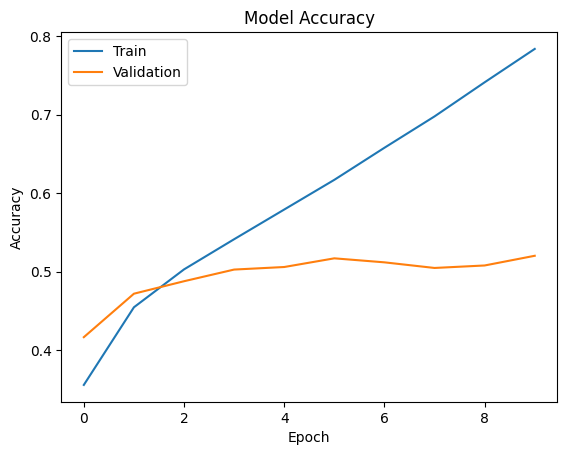

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

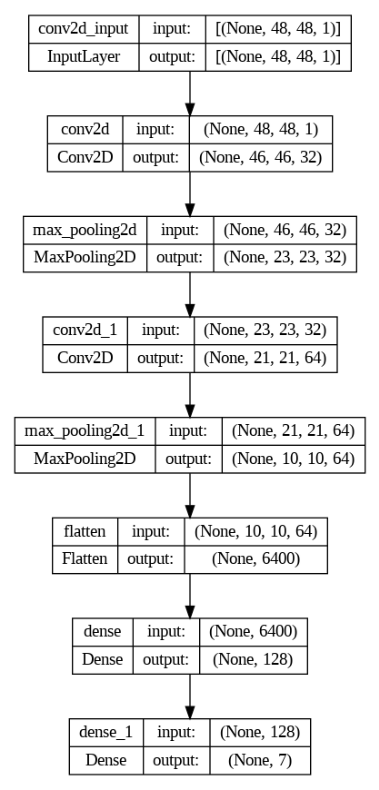

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

# Plot the model architecture
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model_plot.png')

# Display the model architecture on screen
image = plt.imread('model_plot.png')
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 185ms/step


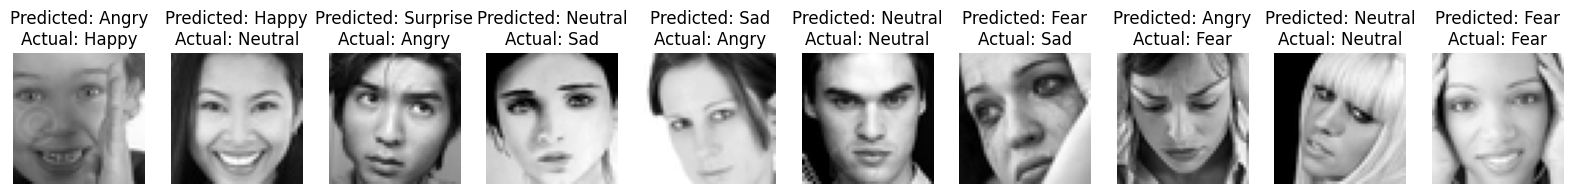

In [34]:
import matplotlib.pyplot as plt

# Select a few images from the test set
num_images = 10
selected_images = X_test[:num_images]
selected_labels = y_test[:num_images]

# Predict the labels for the selected images
predicted_labels = model.predict(selected_images)
predicted_classes = np.argmax(predicted_labels, axis=1)

# Define class labels
class_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# Plot the selected images with their predicted labels
plt.figure(figsize=(20, 20))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(selected_images[i].reshape(48, 48), cmap='gray')
    plt.title(f'Predicted: {class_labels[predicted_classes[i]]}\nActual: {class_labels[np.argmax(selected_labels[i])]}')
    plt.axis('off')
plt.show()

Saving 1.BMP to 1.BMP
Saving 2.BMP to 2.BMP
Saving 3.BMP to 3.BMP
Saving 4.BMP to 4.BMP
Saving 5.BMP to 5.BMP
Saving 6.BMP to 6.BMP
Saving 7.BMP to 7.BMP
Saving 8.BMP to 8.BMP
Saving 9.BMP to 9.BMP
Saving 10.BMP to 10.BMP
1/1 [==============================] - 0s 133ms/step


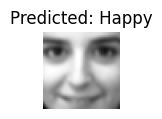

1/1 [==============================] - 0s 24ms/step


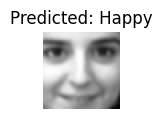

1/1 [==============================] - 0s 27ms/step


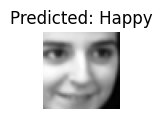

1/1 [==============================] - 0s 25ms/step


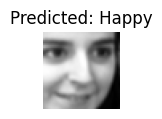

1/1 [==============================] - 0s 24ms/step


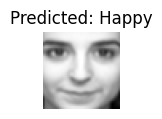

1/1 [==============================] - 0s 24ms/step


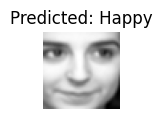

1/1 [==============================] - 0s 26ms/step


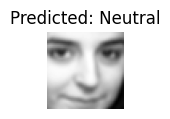

1/1 [==============================] - 0s 22ms/step


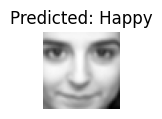

1/1 [==============================] - 0s 21ms/step


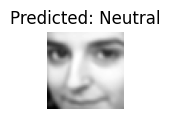

1/1 [==============================] - 0s 29ms/step


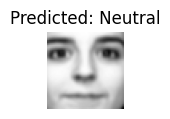

In [35]:
from google.colab import files
from PIL import Image
import numpy as np

# Download the faces database and save on your laptop
#   https://drive.google.com/file/d/1KIr-oCHhZn7gq60XI9cbGP-ibZIS33VE/view?usp=sharing

# Upload the faces database from your local machine
uploaded = files.upload()

# Process and test the uploaded images
for filename in uploaded.keys():
    # Load the image
    image = Image.open(filename)
    image = image.convert('L')  # Convert to grayscale
    image = image.resize((48, 48))  # Resize to 48x48
    pixels = np.array(image)  # Convert to numpy array
    pixels = pixels.reshape(1, 48, 48, 1) / 255.0  # Normalize pixel values and reshape

    # Make predictions
    predicted_labels = model.predict(pixels)
    predicted_class = np.argmax(predicted_labels)
    class_label = class_labels[predicted_class]

    # Display the image and prediction
    plt.figure(figsize=(1, 1))
    plt.imshow(image, cmap='gray')
    plt.title(f'Predicted: {class_label}')
    plt.axis('off')
    plt.show()